DATASET: https://drive.google.com/file/d/1qymT-O-pnvqvH5n1lWnUN_NTIUGUgnPK/view?usp=sharing

# Introduction

**Movie Rating Predictor**

Everybody loves movies. We all have unique preferences when it comes to cinematography; we have favorite actors and directors, styles and genres. It’s not uncommon to watch an overhyped movie, only to be disappointed in the end or watch a controversial movie, only to realize that to you it was a masterpiece! And let’s not forget about the endless hours spent trying to choose a movie to watch from your “*To watch*” list. Movie Rating Predictor is a project designed to help with such problems, using the user’s own personal movie datataset along with statistical and machine learning methods. It is a form of recommendation system but instead of recommending which movie to watch, it tries to learn the user’s taste in movies and predict the user’s rating, on movie they haven’t watched yet.

## The problem's nature and the methodology of the approach:


*   Supervised Learning
*   Ordinal Regeression/Ordinal Classification problem:

  *   Multiple Regression (more than one features are used to make predictions)
  *   Univariate Regression (predicts a single value)

\\

Since the target variable is ordinal, the project can be characterized as an ordinal regression/classification problem. In order to take into account the ordinal nature of the problem, first we'll treat it as a regression and after the regression predictions are made, we're going to bin them (by rounding them) into the 10 rating categories. That way we will end up with a set of discrete predictions that are bounded within the range of the ratings and thus our problem can be viewed as a classification after that point. Using this approach, we take into account both the ordinality and the discrete nature of the classes.

More than one models will be created and their results will be compared with each other. The models will be evaluated in 4 different ways: Regression metrics (MAE, $r^2$), Classification Metrics (accuracy), Graphs (to evaluate the range of predictions) and an extra metric which will be the accuracy with a tolerance of $\pm 1$. The final model will be the one that performs overally better at these 4 evaluations steps.

## About the Dataset

The data used for this project, is a dataset of the movies I've watched in the span of a little less than 10 years and it reflects my personal preference in movies. The data were stored and downloaded from IMDb and some extra features were added for each movie using the Cinemagoer package. Series were excluded from the dataset due to the belief that their rating criteria are not the same as for movies.

From now on, to avoid confusion, I will be referring to the target variable "My Rating" simply as rating and to the variable "IMDb Rating" as IMDb Rating.

# Load Basic Libraries and Data


In [ ]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure

path = 'dataset_path_here
'data = pd.read_csv(path)

In [ ]:
# A first glance at the data
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Position        668 non-null    int64  
 1   Const           668 non-null    int64  
 2   Created         668 non-null    object 
 3   Modified        668 non-null    object 
 4   Description     0 non-null      float64
 5   Title           668 non-null    object 
 6   URL             668 non-null    object 
 7   Title Type      668 non-null    object 
 8   IMDb Rating     668 non-null    float64
 9   Runtime (mins)  668 non-null    int64  
 10  Year            668 non-null    int64  
 11  Genres          668 non-null    object 
 12  Num Votes       668 non-null    int64  
 13  Release Date    668 non-null    object 
 14  Directors       668 non-null    object 
 15  Your Rating     651 non-null    float64
 16  Date Rated      632 non-null    object 
 17  Actors          668 non-null    obj

,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),...,Genres,Num Votes,Release Date,Directors,Your Rating,Date Rated,Actors,Writer,Countries,Languages
0,0,808417,1/16/2014,1/16/2014,NaN,Persepolis,https://www.imdb.com/title/tt0808417/,movie,8.0,96,...,"Animation, Biography, Drama, History, War",93503,5/23/2007,"Marjane Satrapi, Vincent Paronnaud",10.0,8/25/2014,"Chiara Mastroianni, Danielle Darrieux, Catheri...",Marjane Satrapi,"France, United States","French, English, Persian, German"
1,1,1675434,1/16/2014,1/16/2014,NaN,Intouchables,https://www.imdb.com/title/tt1675434/,movie,8.5,112,...,"Biography, Comedy, Drama",827632,9/23/2011,"Olivier Nakache, Éric Toledano",8.0,8/25/2014,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",Olivier Nakache,France,"French, English"
2,2,1213648,1/16/2014,1/16/2014,NaN,London Boulevard,https://www.imdb.com/title/tt1213648/,movie,6.2,103,...,"Crime, Drama",47891,11/26/2010,William Monahan,6.0,8/25/2014,"Colin Farrell, Keira Knightley, David Thewlis,...",William Monahan,"United States, United Kingdom",English
3,3,118715,1/16/2014,1/16/2014,NaN,The Big Lebowski,https://www.imdb.com/title/tt0118715/,movie,8.1,117,...,"Comedy, Crime",787611,1/18/1998,"Joel Coen, Ethan Coen",7.0,8/25/2014,"Jeff Bridges, John Goodman, Julianne Moore, St...",Ethan Coen,"United States, United Kingdom","English, German, Hebrew, Spanish"
4,4,245429,1/16/2014,1/16/2014,NaN,Sen to Chihiro no kamikakushi,https://www.imdb.com/title/tt0245429/,movie,8.6,125,...,"Animation, Adventure, Family, Fantasy, Mystery",727365,7/20/2001,Hayao Miyazaki,7.0,8/25/2014,"Rumi Hiiragi, Miyu Irino, Mari Natsuki, Takash...",Hayao Miyazaki,Japan,"Japanese, English"


# Basic preprocessing

Looking at the data features above, we notice that some are irrelevant to the project. We'll remove those and transform some feature types into more convinient ones.

In [ ]:
modified_data = data.drop(["Position", "Const", "Created", "Modified", "URL", "Title Type", "Date Rated", "Description"], 1)

# Transform to list types, features that have lists but are in string form.
modified_data["Genres"] = list(genre.split(', ') for genre in modified_data["Genres"])
modified_data["Actors"] =  list(actor.split(', ') for actor in modified_data["Actors"])
modified_data["Directors"] = list(director.split(', ') for director in modified_data["Directors"])
modified_data["Writer"] = list(writer for writer in modified_data["Writer"])
modified_data["Countries"] = list(country.split(', ') for country in modified_data["Countries"])
modified_data["Languages"] = list(language.split(', ') for language in modified_data["Languages"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


# Exploratory Data Analysis

We'll now perform EDA on the data in order to search for valuable information, possible corelation between features and any difficulties or constraints we might face. Since the dataset contains both numerical and categorical features, the process of EDA will be split into two parts, one for quantitative data and one for qualitative.

In [ ]:
# Get numerical and categorical features
categorical_features = list(modified_data.select_dtypes(include=['object']).columns)
numerical_features = list(f for f in modified_data.columns if f not in categorical_features)

print("Numerical Features: ", numerical_features, ", ",len(numerical_features))
print("\nCategorical Features: ", categorical_features, ", ",len(categorical_features))

Numerical Features:  ['IMDb Rating', 'Runtime (mins)', 'Year', 'Num Votes', 'Your Rating'] ,  5

Categorical Features:  ['Title', 'Genres', 'Release Date', 'Directors', 'Actors', 'Writer', 'Countries', 'Languages'] ,  8


## - Quantitative Data


In [ ]:
# Descriptive statistics
modified_data.describe(percentiles=[0.5])

,IMDb Rating,Runtime (mins),Year,Num Votes,Your Rating
count,668.000000,668.000000,668.000000,6.680000e+02,651.000000
mean,7.130689,110.236527,2003.004491,3.189911e+05,6.211982
std,0.941768,24.390828,11.689446,3.682288e+05,1.641175
min,3.300000,1.000000,1898.000000,2.800000e+01,1.000000
50%,7.250000,107.000000,2005.000000,2.021345e+05,6.000000
max,9.300000,202.000000,2021.000000,2.572646e+06,10.000000


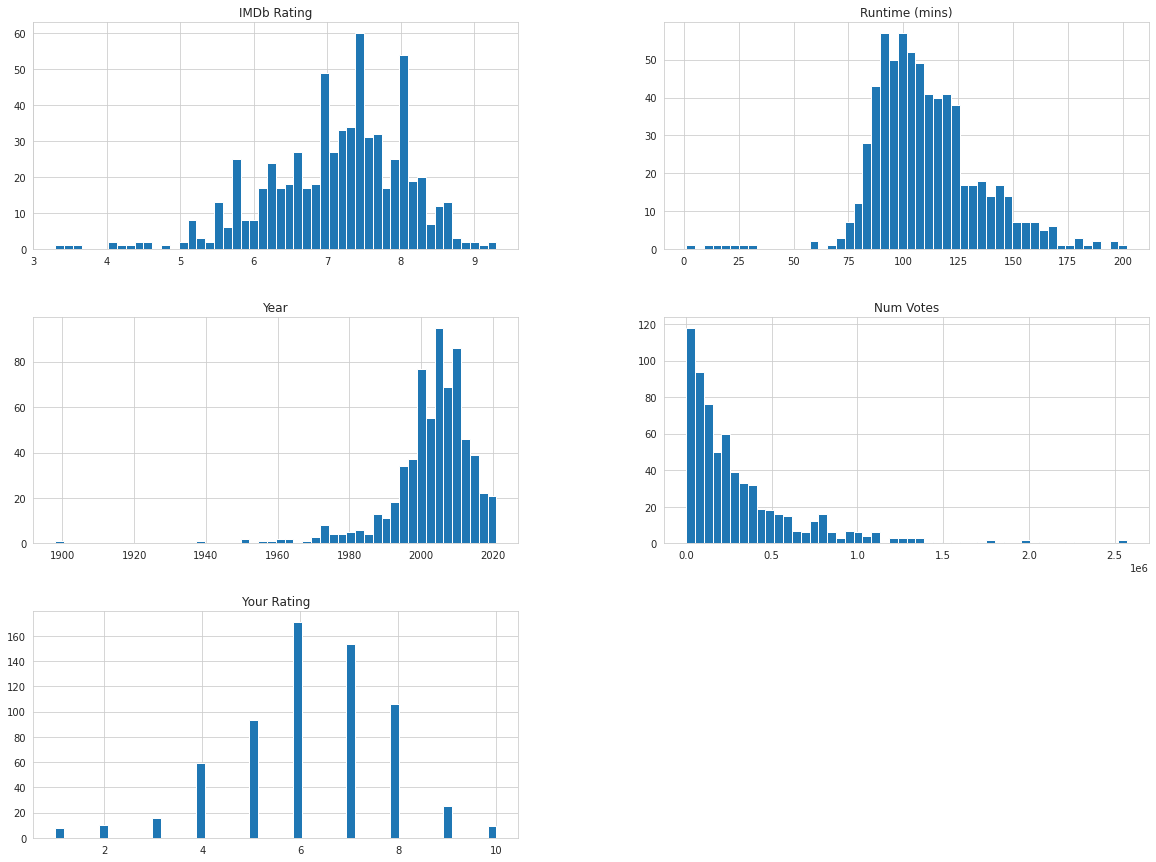

In [ ]:
# Descriptive Graphs
modified_data[numerical_features].hist(bins=50, figsize=(20,15));

Based on the descriptive measures from above, we notice that the rating median is 6 and the standard deviation is 1.6. We also notice the first possible obstacle in the data. From the quartiles, it seems that about 50% of the ratings are in the range [5,7]. That along with its histogram (barchart) signifies that we are dealing with a highly imbalanced dataset. Due to that we're going to add synthetic instances using SMOTE-NC later on the project.


Number of movies in dataset: 668
--------------------------------------------------

Movies without rating: 17

(~ 2% without a rating) 

--------------------------------------------------

Number of movies rated with:

Rating: 1, Count: 8
Rating: 2, Count: 10
Rating: 3, Count: 16
Rating: 4, Count: 59
Rating: 5, Count: 93
Rating: 6, Count: 171
Rating: 7, Count: 154
Rating: 8, Count: 106
Rating: 9, Count: 25
Rating: 10, Count: 9
--------------------------------------------------


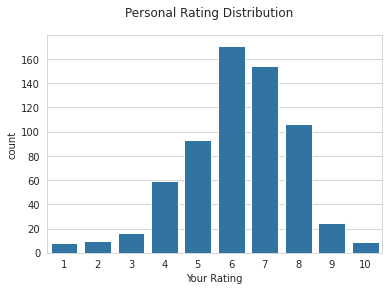

In [ ]:
sns.set_style("whitegrid")

num_movies = len(modified_data)
unrated_movies = modified_data['Your Rating'].isnull().sum()

print(f"\nNumber of movies in dataset: {num_movies}")
print("-"*50)

print(f"\nMovies without rating: {unrated_movies}")
print(f"\n(~ {unrated_movies*100//num_movies}% without a rating) \n")
print("-"*50)

print("\nNumber of movies rated with:\n")
for i in range(1, 11):
  print(f"Rating: {i}, Count: {modified_data[modified_data['Your Rating']==i].count()['Title']}")
print("-"*50)

fig = plt.figure()
sns.countplot(x="Your Rating", data=modified_data, order=list(range(1,11)), color='tab:blue');
fig.suptitle("Personal Rating Distribution");

Investigating further, we verified the previous observation. One more thing we now know for the target varible is that there are almost no null values.

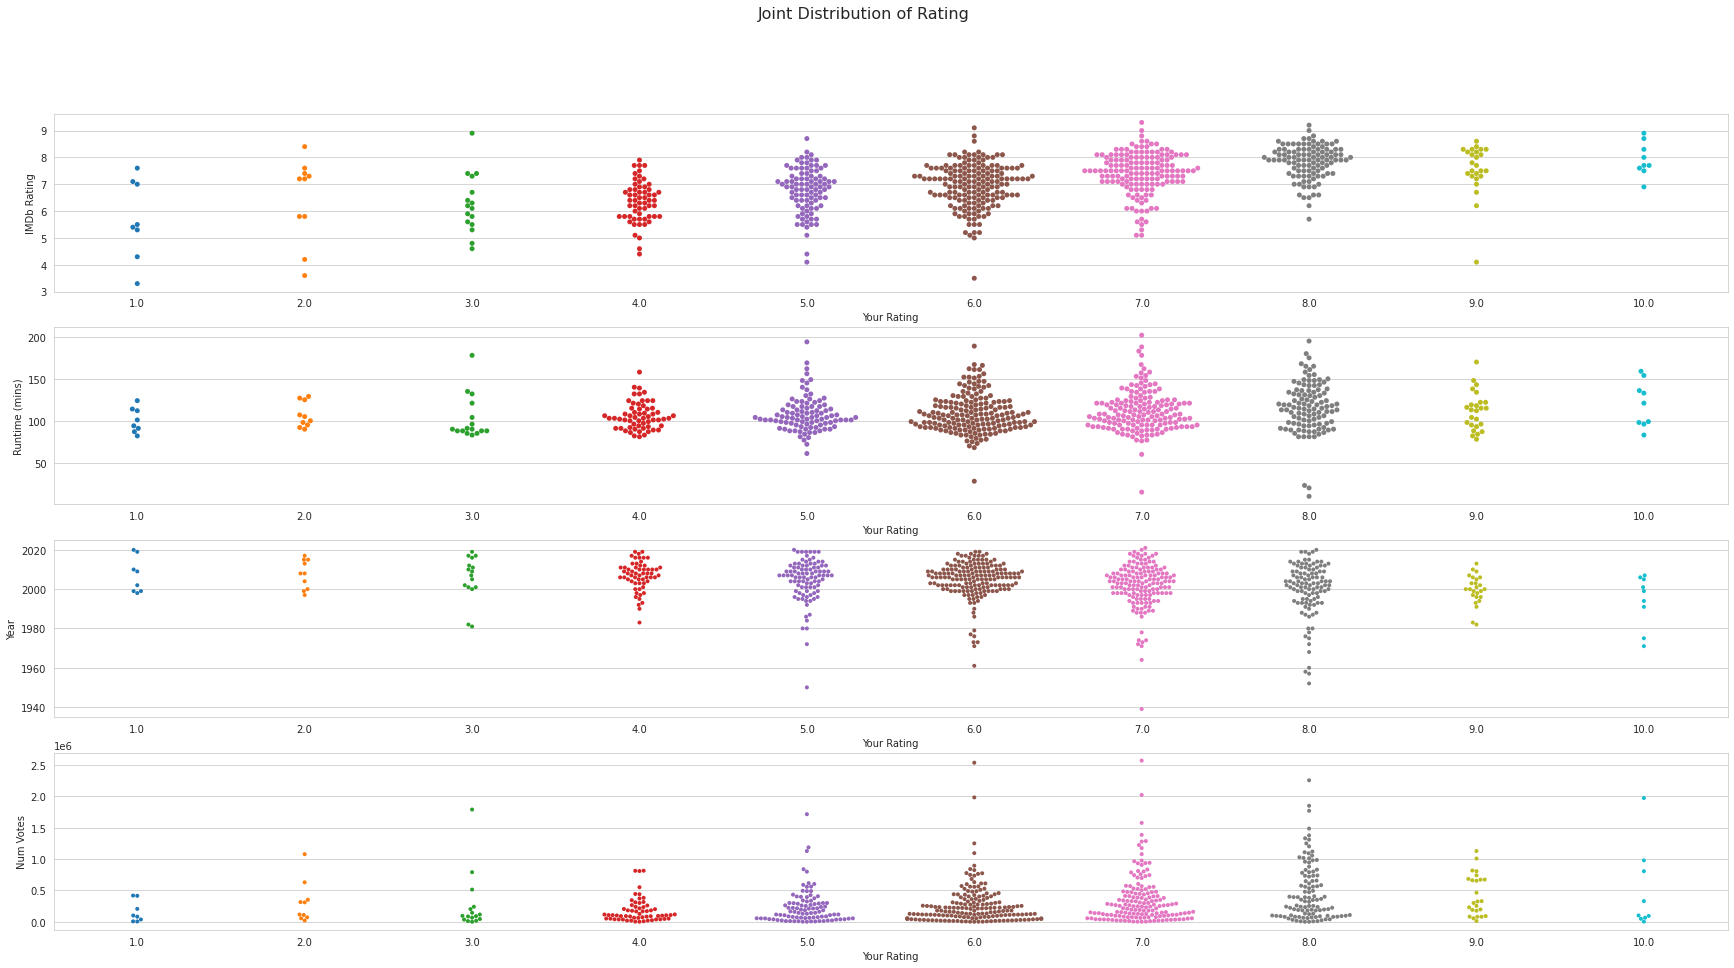

In [ ]:
fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(4,1,1) 
sns.swarmplot(x='Your Rating', y='IMDb Rating', data=modified_data);

ax2 = fig.add_subplot(4,1,2) 
sns.swarmplot(x='Your Rating', y='Runtime (mins)', data=modified_data);

ax3 = fig.add_subplot(4,1,3) 
sns.swarmplot(x='Your Rating', y='Year', data=modified_data, s=4);

ax4 = fig.add_subplot(4,1,4) 
sns.swarmplot(x='Your Rating', y='Num Votes', data=modified_data, s=4);

fig.suptitle("Joint Distribution of Rating", fontsize=16);

By looking the joint distribution of rating and the other numerical features using the swarmplots above, there doesn't seem to be any obvious correlations other than a linear correlation between IMDb rating and the rating. Let's test it:

In [ ]:
print("Linear Correlation between Rating and IMDb Rating: ", modified_data["Your Rating"].corr(modified_data["IMDb Rating"]))

Linear Correlation between Rating and IMDb Rating:  0.5032048693468257


Indeed, there is a strong linear correlation between the two variables.

## - Qualitative Data

### Rating and Year

We will try to analyze the relationship of rating and year. To make the process easier and the result more clear, we'll transform the years into intervals. We'll fit the years into 4 intervals: Historical Value movies (1890-1960), Old Movies (1960-2000), Modern Movies (2000-2010), Movies in the Technology/Internet era (2010-2022)


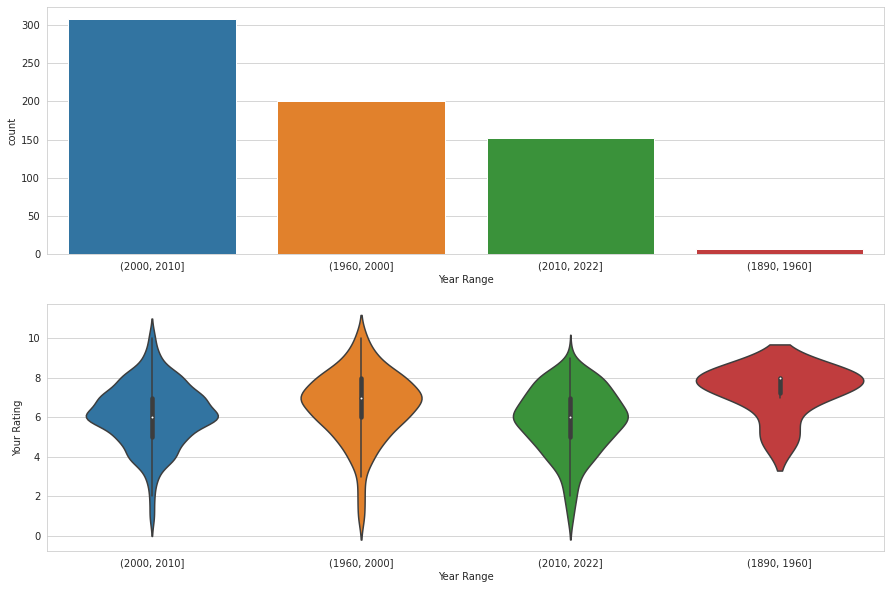

In [ ]:
bins = pd.IntervalIndex.from_tuples([(1890, 1960), (1960, 2000), (2000, 2010), (2010, 2022)])

modified_data['Year Range'] = pd.cut(modified_data['Year'], bins)

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(x="Year Range", data=modified_data, ax=ax1, order=modified_data['Year Range'].value_counts().index)

ax2 = fig.add_subplot(2,1,2) 
sns.violinplot(x='Year Range', y='Your Rating', data=modified_data,  ax=ax2, order=modified_data['Year Range'].value_counts().index);


From the violin plots above, we notice that the rating is significantly higher for movies in the 1980-1960 era. The median rating for that category has a value of 8 while the median of all ratings is 6. However, this is the category with the least counts, so we cannot be confident that this is a representative median rating for that era in general

### Rating and Genre 

Let's analyze the relationship between genre and rating

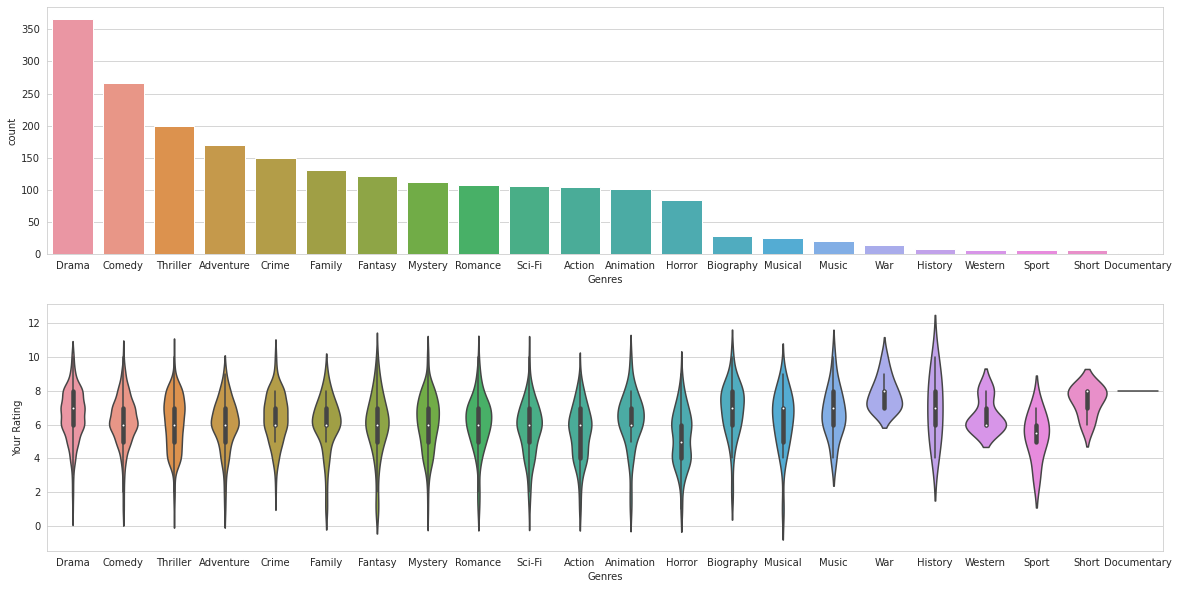

In [ ]:
exploded_data = modified_data.explode("Genres")

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(x="Genres", data=exploded_data, ax=ax1, order=exploded_data['Genres'].value_counts().index)

ax2 = fig.add_subplot(2,1,2) 
sns.violinplot(x="Genres", y="Your Rating", data=exploded_data, order=exploded_data['Genres'].value_counts().index);

From the violin plots above, we can see that some genres seems to be an important factor for the rating of a movie. The ones we can be most confident about their general significance on a movie's rating, are Drama and Horror with a median rating of 7 and 5 respectively. Also interesting are War and Short with median ratings of 8 but there are very few instances in these categories and generilizing is riskier.

# -Feature Generation

We'll create new features by combining or modifying existing features in hopes of discovering some interesting relatioship.

### Release Month and Rating

Split dates by month to check if the dump months theory is relevant (Dump months: January, February and August, September)


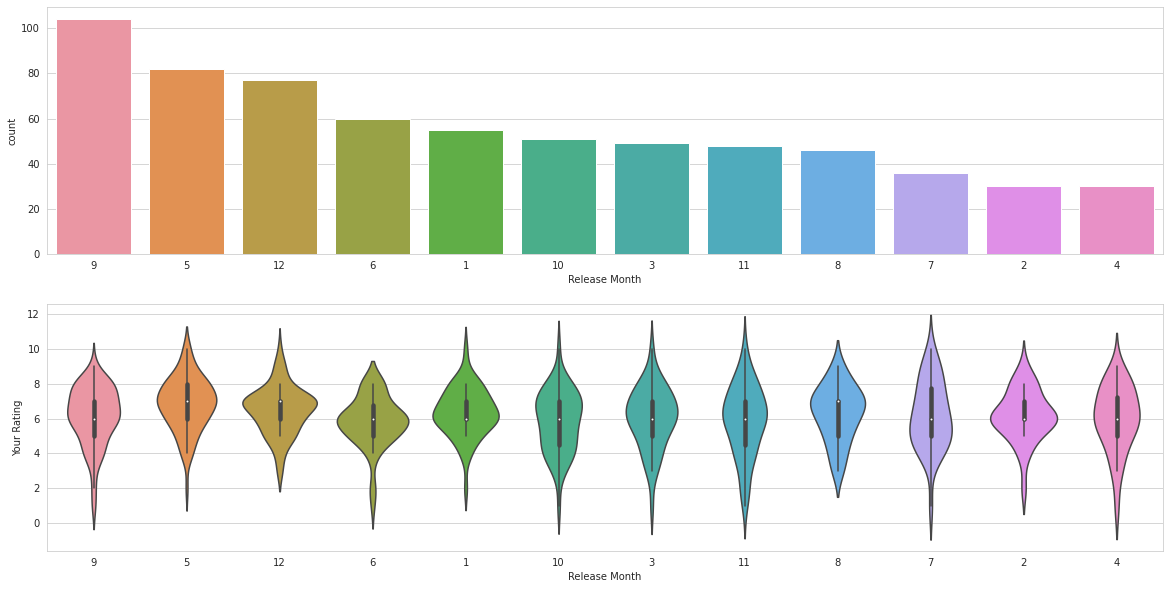

In [ ]:
modified_data['Release Month'] = list(int(date.split('/')[0]) for date in modified_data['Release Date'])

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(x="Release Month", data=modified_data, ax=ax1, order=modified_data['Release Month'].value_counts().index)

ax2 = fig.add_subplot(2,1,2) 
sns.violinplot(x='Release Month', y='Your Rating', data=modified_data,  ax=ax2, order=modified_data['Release Month'].value_counts().index);

There doesn't seem to be any significant correlation between Dump Months and Rating. Interestingly enough, August has a higher median rating even though it is considered dump month

### Crew and Rating

Create lists for all the actors, all the directors and all the writers that appear in the dataset and see how many unique are there in each category.

In [ ]:
from collections import Counter

# Find all actors, directors and wirters in data
all_actors = [actor for actor_list in modified_data["Actors"].tolist() for actor in actor_list]
all_directors = [director for director_list in modified_data["Directors"].tolist() for director in director_list]
all_writers = [writer for writer in modified_data["Writer"].tolist()]



In [ ]:
print("Number of unique actors: ", len(Counter(all_actors)))
print("Number of unique directors: ", len(Counter(all_directors)))
print("Number of unique wtiters: ", len(Counter(all_writers)))

Number of unique actors:  2354
Number of unique directors:  505
Number of unique wtiters:  503


The number of unique actors, directors and writers is too big to be meaningfull in prediction of the rating. To overcome that and keep only the most valuable information, we'll find the 20 most frequent actors, directors and writers (60 total). A new feature "Crew MVPs" will be created. This feature is a list of the names of the crew members that are also in the 60 most frequent. If none of the movie's crew members are in the 60 most frequent, the Crew MVPs list will only have the value "Others".

In [ ]:
from collections import Counter

# Find all actors, directors and wirters in data
all_actors = [actor for actor_list in modified_data["Actors"].tolist() for actor in actor_list]
all_directors = [director for director_list in modified_data["Directors"].tolist() for director in director_list]
all_writers = [writer for writer in modified_data["Writer"].tolist()]

# Find most watched actors/directors/writers
top_actors = np.array(Counter(all_actors).most_common(20))  # Find 20 most common
top_directors = np.array(Counter(all_directors).most_common(20))
top_writers = np.array(Counter(all_writers).most_common(20))

crew_MVPs = []

threshold = 5  # Frequency threshold for a crew member to be considered relevant
for [actor, actor_count], [director, director_count], [writer, writer_count] in zip(top_actors, top_directors, top_writers):
  if actor not in crew_MVPs and int(actor_count) >= threshold:
    crew_MVPs.append(actor)
  
  if director not in crew_MVPs and int(director_count) >= threshold:
    crew_MVPs.append(director)

  if writer not in crew_MVPs and int(writer_count) >= threshold:
    crew_MVPs.append(writer)

In [ ]:
# Create new column with the top actors/directors/writer for each film to minimize the number of categorical variables 
all_crew_MVPs = []

# Find all actors, directors and wirters in each movie
all_movie_actors = [actor_list for actor_list in modified_data["Actors"].tolist()]
all_movie_directors = [director_list for director_list in modified_data["Directors"].tolist()]
all_movie_writers = [writer_list for writer_list in modified_data["Writer"].tolist()]

# Iterate through movies crew
for movie_crew in zip(all_movie_actors, all_movie_directors, all_movie_writers):
  crew = []
  # Iterate through crew members
  for crew_member in (movie_crew[0] + movie_crew[1] + [movie_crew[2]]):
    # If crew member is in most common and not already in list
    if crew_member in crew_MVPs and crew_member not in crew:
      crew.append(crew_member)

  if not crew:
    crew.append("Others")

  all_crew_MVPs.append(crew)

modified_data["Crew MVPs"] = all_crew_MVPs

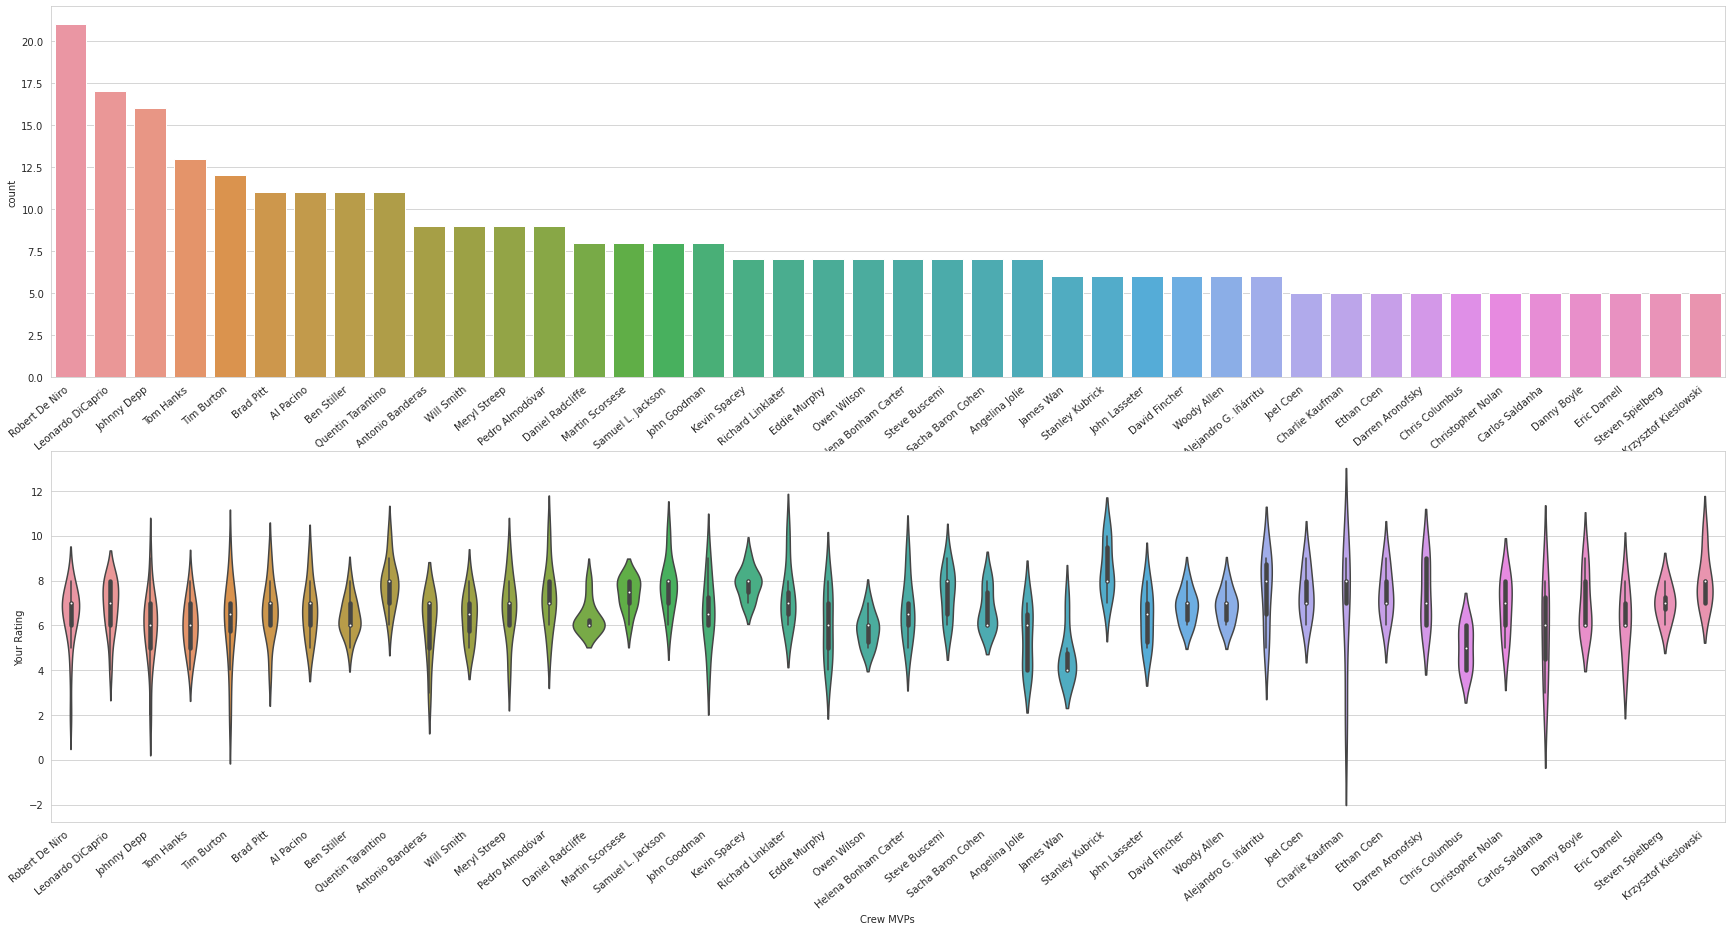

In [ ]:
exploded_data = modified_data.explode("Crew MVPs").reset_index(drop=True)
filtered_crew = exploded_data.loc[exploded_data["Crew MVPs"] != 'Others'] # Filtered dataframe only with the rows with relevant directors

fig = plt.figure(figsize=(30,15))

ax1 = fig.add_subplot(2,1,1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
sns.countplot(x="Crew MVPs", data=filtered_crew, ax=ax1, order=filtered_crew['Crew MVPs'].value_counts().index)

ax2 = fig.add_subplot(2,1,2) 
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
sns.violinplot(x="Crew MVPs", y="Your Rating", data=filtered_crew, ax=ax2, order=filtered_crew['Crew MVPs'].value_counts().index);

The rating seems to be flactuating quite a bit, depending on the crew members of a movie. Due to that, rating and Crew MVPs seem to be correlated in some way. Some notable mentions that seem to affect the rating the most are Kenvin Spacey and Stanley Kubrick which have a median rating of 8 and have a smaller interquartile range than other crew members with the same median.

### Title Length and Rating

In [ ]:
all_titles_length = []
for title in modified_data["Title"]:
  words = title.split(' ')
  all_titles_length.append(len(words))

modified_data["Title Length"] = all_titles_length

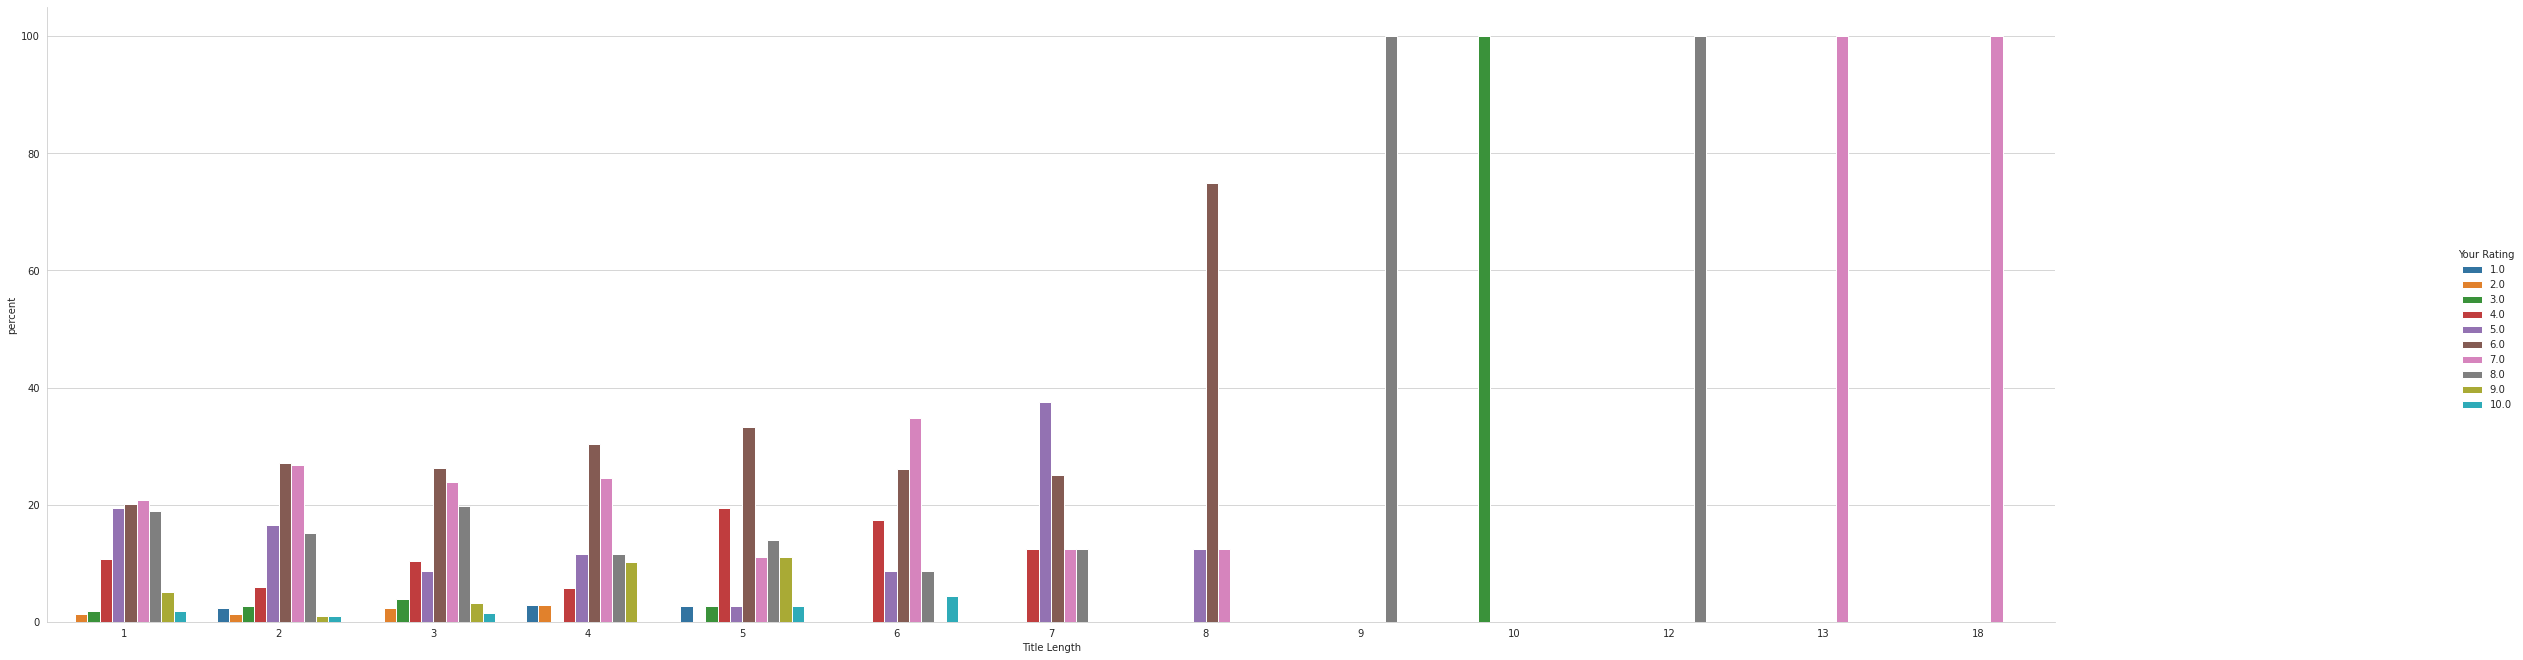

In [ ]:
x,y = 'Title Length', 'Your Rating'

graph = (modified_data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'));

graph.fig.set_size_inches(40,10)

In [ ]:
print("Title Length-Your Rating (linear) correlation: ",modified_data['Your Rating'].corr(modified_data['Title Length']))

Title Length-Your Rating (linear) correlation:  0.0035398935029359473


Neither the plot nor the Pearson's coefficient show any correlation between the length of the title and the rating.

### Foreign Films and Rating

We'll create a new binary feature "Foreign". A film is considered foreign if it is shot primarily outside USA, Canada or UK and the primary language spoken is not English. In the dataset the first Country and the first Language, in the columns "Country" and "Language" respectively, represent the primary ones from each category.

In [ ]:
primary_countries = [countries[0] for countries in modified_data["Countries"].to_list()]
primary_languages = [languages[0] for languages in modified_data["Languages"].to_list()]

all_is_foreign = []
for country, language in zip(primary_countries, primary_languages):
  if country not in ('United States', 'United Kingdom', 'Canada') and language != 'English':
      is_foreign = 1
  else:
      is_foreign = 0

  all_is_foreign.append(is_foreign)

modified_data['Foreign'] = all_is_foreign

categorical_features.append('Foreign')

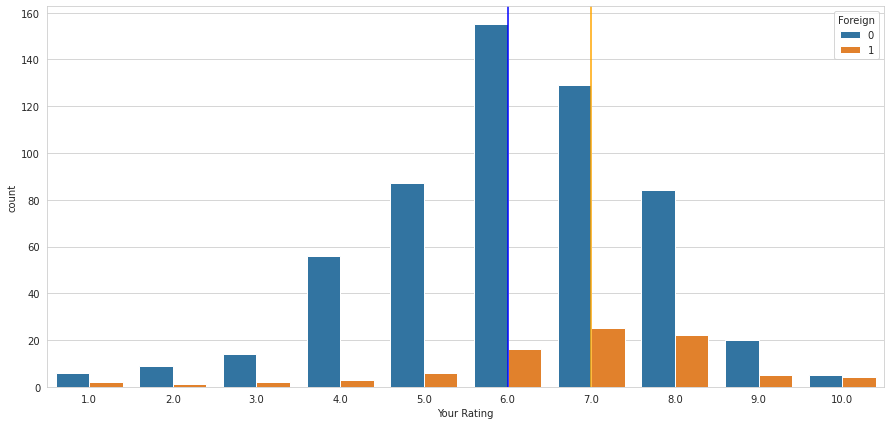

In [ ]:
fig = plt.figure(figsize=(15,7))

sns.countplot(x='Your Rating', data=modified_data, hue='Foreign');
plt.axvline(x=(modified_data["Your Rating"][modified_data["Foreign"]==0].median()-1), color='blue');
plt.axvline(x=(modified_data["Your Rating"][modified_data["Foreign"]==1].median()-1), color='orange');

The histplot above shows that foreign films have a significantly greater left skew and a bigger median than non-foreign. This indicates that foreign films tend to have better rating.

# Preprocessing Data

We're going to prepare our data in order to fit them to our model. The models that will be used later on for the predictions do not work with categorical variables so variable transformation from categorical to numerical is mandatory.

The categorical variables in question are "Genres", "Crew MVPs" and "Year Range". Since Genres and Crew MVPs can have more than one value per movie instance, their encoding will be done using MultiLabelBinazer instead of a typical OneHotEncoding. The Year Range is an ordinal variable so the encoding will be done using OrdinalEncoder.

## Encode categorical Data

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OrdinalEncoder

all_genres = modified_data.explode("Genres")["Genres"].unique()  # Find all uniques genres
all_crew = modified_data.explode("Crew MVPs")["Crew MVPs"].unique()  # Find all unique crew members

categorical_features.extend(list(all_genres) + list(all_crew))  # Extend list of categorical features

mlb = MultiLabelBinarizer()

genres_df = pd.DataFrame(mlb.fit_transform(modified_data['Genres']), columns=mlb.classes_)  # Binarize Genres
mvps_df = pd.DataFrame(mlb.fit_transform(modified_data['Crew MVPs']), columns=mlb.classes_)  # Binarize Crew
processed_data = pd.concat([modified_data, mvps_df, genres_df], 1)  # Concat dataframes

year_range_map = {"(1890, 1960]": 1, "(1960, 2000]":2, "(2000, 2010]":3, "(2010, 2022]":4}
processed_data["Year Range"] = processed_data["Year Range"].astype("string")  # Convert to string to prepare for encoding
processed_data["Year Range"] = processed_data["Year Range"].replace(year_range_map)  # Ordinal encoding Year Range

categorical_features.append("Year Range")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  del sys.path[0]


In [ ]:
print(processed_data.columns)

print("\nTotal number of features: ", len(processed_data.columns))

Index(['Title', 'IMDb Rating', 'Runtime (mins)', 'Year', 'Genres', 'Num Votes',
       'Release Date', 'Directors', 'Your Rating', 'Actors', 'Writer',
       'Countries', 'Languages', 'Year Range', 'Release Month', 'Crew MVPs',
       'Title Length', 'Foreign', 'Al Pacino', 'Alejandro G. Iñárritu',
       'Angelina Jolie', 'Antonio Banderas', 'Ben Stiller', 'Brad Pitt',
       'Carlos Saldanha', 'Charlie Kaufman', 'Chris Columbus',
       'Christopher Nolan', 'Daniel Radcliffe', 'Danny Boyle',
       'Darren Aronofsky', 'David Fincher', 'Eddie Murphy', 'Eric Darnell',
       'Ethan Coen', 'Helena Bonham Carter', 'James Wan', 'Joel Coen',
       'John Goodman', 'John Lasseter', 'Johnny Depp', 'Kevin Spacey',
       'Krzysztof Kieslowski', 'Leonardo DiCaprio', 'Martin Scorsese',
       'Meryl Streep', 'Others', 'Owen Wilson', 'Pedro Almodóvar',
       'Quentin Tarantino', 'Richard Linklater', 'Robert De Niro',
       'Sacha Baron Cohen', 'Samuel L. Jackson', 'Stanley Kubrick',
       'St

After the encoding, the dataset has a total of 83 features. Given that the dataset has only 668 instances and the large number of features, the data will become sparse. Effectively, the data will be noisy and the noise will be fit into the model increasing the chance of overfitting. To avoid that, to the best of our ability, we will remove a number of features from the dataset.

## Feature Selection

### Check for Linear Correlation

First we'll check for highly linear correlated features in the dataset. We set the threshold for removal of a feature to be r > 0.8

In [ ]:
processed_data.corr()

,IMDb Rating,Runtime (mins),Year,Num Votes,Your Rating,Year Range,Release Month,Title Length,Foreign,Al Pacino,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
IMDb Rating,1.000000,0.427003,-0.245544,0.598299,0.503205,-0.200125,0.037315,-0.041770,0.105357,0.100778,...,0.068879,-0.030736,-0.022727,-0.045036,-0.080774,0.017128,-0.004791,-0.027851,0.142929,0.048196
Runtime (mins),0.427003,1.000000,-0.026091,0.459742,0.140065,-0.030829,0.140193,0.005387,-0.023757,0.194212,...,-0.043988,-0.146244,0.032639,-0.007588,-0.047249,-0.367448,-0.039985,0.071171,0.071903,0.075002
Year,-0.245544,-0.026091,1.000000,-0.051212,-0.210080,0.809573,-0.044708,0.022982,-0.085412,-0.180312,...,-0.023572,-0.085156,0.080449,0.015906,0.078403,-0.092408,-0.042147,0.121931,-0.074317,0.064148
Num Votes,0.598299,0.459742,-0.051212,1.000000,0.222717,-0.070544,0.068448,0.009669,-0.195184,0.065048,...,-0.054006,-0.051262,-0.014464,-0.096260,0.035385,-0.081889,-0.021040,0.008095,0.100892,0.051996
Your Rating,0.503205,0.140065,-0.210080,0.222717,1.000000,-0.182284,-0.030665,0.003540,0.137680,0.033927,...,0.055922,0.008289,-0.021246,-0.032054,-0.120355,0.063734,-0.051676,-0.052169,0.142245,0.022852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Short,0.017128,-0.367448,-0.092408,-0.081889,0.063734,0.011983,0.069964,0.005308,0.103664,-0.012319,...,0.073779,-0.018772,-0.042729,-0.041577,-0.041346,1.000000,-0.009063,-0.062014,-0.013929,-0.009797
Sport,-0.004791,-0.039985,-0.042147,-0.021040,-0.051676,-0.051544,-0.009045,-0.047092,-0.037083,-0.012319,...,-0.017152,-0.018772,-0.042729,-0.041577,0.002080,-0.009063,1.000000,-0.062014,-0.013929,-0.009797
Thriller,-0.027851,0.071171,0.121931,0.008095,-0.052169,0.116934,-0.058689,-0.145347,-0.050479,0.018598,...,-0.098595,-0.111195,0.303479,-0.186308,0.102327,-0.062014,-0.062014,1.000000,-0.072454,-0.002743
War,0.142929,0.071903,-0.074317,0.100892,0.142245,-0.051321,-0.008798,0.073348,0.035712,-0.018932,...,0.033532,0.026212,-0.065667,-0.035404,-0.063542,-0.013929,-0.013929,-0.072454,1.000000,-0.015056


In [ ]:
# Print 20 most correlated features (by absolute value)
correlations = processed_data.corr().abs()
s = correlations.unstack()
sorted_corr = s.sort_values(kind="quicksort")

sorted_corr.drop_duplicates(keep='first', inplace=True)

print(sorted_corr[-20:-1])

Steve Buscemi         John Goodman            0.394114
Eric Darnell          Ben Stiller             0.398191
Fantasy               Adventure               0.399863
Samuel L. Jackson     Quentin Tarantino       0.418308
IMDb Rating           Runtime (mins)          0.427003
Pedro Almodóvar       Antonio Banderas        0.436857
John Lasseter         Tom Hanks               0.446039
Runtime (mins)        Num Votes               0.459742
Helena Bonham Carter  Johnny Depp             0.464622
Tim Burton            Johnny Depp             0.494811
Eric Darnell          Sacha Baron Cohen       0.502752
IMDb Rating           Your Rating             0.503205
Family                Fantasy                 0.508166
Animation             Adventure               0.592808
IMDb Rating           Num Votes               0.598299
Tim Burton            Helena Bonham Carter    0.650185
Adventure             Family                  0.698203
Animation             Family                  0.786121
Year      

The only 2 features with a correlation above the decided threshold are "Year" and "Year Range". We will select only one of these to input to the model

In [ ]:
rating_correlations = processed_data[processed_data.columns].corr()['Your Rating'].abs()

sorted_corr = rating_correlations.sort_values(kind="quicksort")

sorted_corr.drop_duplicates(keep='first', inplace=True)

print(sorted_corr[-20:-1])

Biography               0.085596
James Wan               0.090885
Krzysztof Kieslowski    0.095922
Kevin Spacey            0.104591
Samuel L. Jackson       0.104612
Sci-Fi                  0.120355
Quentin Tarantino       0.128406
Stanley Kubrick         0.134566
Foreign                 0.137680
Runtime (mins)          0.140065
War                     0.142245
Action                  0.179407
Year Range              0.182284
Others                  0.196340
Year                    0.210080
Num Votes               0.222717
Horror                  0.228578
Drama                   0.249040
IMDb Rating             0.503205
Name: Your Rating, dtype: float64


We notice that there are a few features that are linearly correlated with the rating. Namely, IMDb Rating has a strong correlation with the rating and Drama, Horror, Num Votes and Year have a weak correlation. Note that the above table contains the absolute value of correlations (for ease in sorting), so we cannot determine whether it is positive or negative correlation.

### Final selection

Since there weren't a lot of features that are linearly correlated with each other that we can remove (other thn Year and Year range), we're going to use SelectKBest to determine the most important features in relation to the rating. We will keep only these features to train our model. After some experimentation, the number of features to be selected was set to k=20. Other possible candidates were k=15 and k=17. Different models worked better with different values of k but ultimately k=20 had the best results

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

movie_titles = processed_data["Title"].to_list()  # Save movie titles in case it's needed later

# Feature to be excluded
except_features = ["Title", "Your Rating", "Release Date",
                   "Genres", "Directors", "Actors", "Writer", "Countries", 
                   "Languages", "Year", "Crew MVPs"]

# Select features
features = [f for f in list(processed_data.columns) if f not in except_features]

processed_data = processed_data.dropna().reset_index(drop=True)

X = processed_data[features]
y = processed_data["Your Rating"]

# Create and fit selector
selector = SelectKBest(score_func=f_regression, k=20)
selector.fit(X, y)

# Keep only selected columns
cols = selector.get_support(indices=True)
X = X.iloc[:,cols]

print("New X columns:\n\n",X.columns)


New X columns:

 Index(['IMDb Rating', 'Runtime (mins)', 'Num Votes', 'Year Range', 'Foreign',
       'James Wan', 'Kevin Spacey', 'Krzysztof Kieslowski', 'Martin Scorsese',
       'Others', 'Quentin Tarantino', 'Samuel L. Jackson', 'Stanley Kubrick',
       'Steve Buscemi', 'Action', 'Biography', 'Drama', 'Horror', 'Sci-Fi',
       'War'],
      dtype='object')


## Class Distribution Adjustment

One of the things we noticed early on, is that the dataset is higly imbalanced. The least populated class and the most populated class have a ratio of about 1:21. If the class distribution stays like that, the model will fail to train, generalize and ultimately predict the least populated classes. To overcome that we will use a variation of SMOTE to create synthetic data for the minority classes. Due to the fact that we have a lot of categorical features, the SMOTE-NC variation was used.

### Oversampling - SMOTENC

First we'll create a boolean mask for the categorical features of the dataset.

In [ ]:
# Create mask
mask = [False]*len(cols)

for column in list(X.columns):
  if column in categorical_features:
    mask[list(X.columns).index(column)] = True

We will also create a function to create the sampling strategy of SMOTE. Only classes with a ratio smaller than $2:3$ will be oversampled. If $N$ is the number of instances in the most populated class and $n$ is the number of instances in a class that will be oversampled, then the new number of instances will be $\min(5n, \frac{2}{3}N)$

In [ ]:
# Various types of SMOTE oversampling
# Create a sampling strategy
def strategy(y, max_ratio=0.7, multiplier=5):
  
  """
  Calculates the oversampling strategy based on the parameters and returns it as 
  a dict. It multiplies each class count with the multiplier parameter or it 
  oversamples it by max_class*max_ratio -where max_class is the most populated 
  class- ignoring the classes for which the instance ratio class:max_class  is 
  bigger than the parameter max_ratio.
  """

  unique, counts = np.unique(y, return_counts=True)
  sampling_strategy = dict(zip(unique, counts))

  for j in range(10):
    # oversample only for ratios > max_ratio
    if sampling_strategy[j+1] / max(counts) < max_ratio:
      sampling_strategy[j+1] = round(min(sampling_strategy[j+1]*multiplier, max(counts)*max_ratio))  # Oversample by multiplier or equal to max_ratio

  return sampling_strategy

A function to implement the SMOTE method is also created, as we will use it inside the cross validation pipeline

In [ ]:
def SMOTENC(X, y):
  # Classic SMOTENC

  from imblearn.over_sampling import SMOTENC

  sampling_strategy = strategy(y)

  # Apply SMOTENC
  # sampling_strategy = {1:70, 2: 80, 3: 100, 4: 100, 5: 100, 9: 80, 10: 70}
  smotenc = SMOTENC(categorical_features=mask, random_state=0, sampling_strategy=sampling_strategy, k_neighbors=5)
  X_smote, y_smote = smotenc.fit_resample(X, y)

  return X_smote, y_smote

Undersampling was also tried but it didn't yield good results possibly due to the fact that even the most populated class still have few instances.

## Scale Data

A function for scaling the data will also be created to be used in the cross validation pipeline. The training data will be standarized to change its range without affecting its distribution.

In [ ]:
def scale_data(X):
  from sklearn.preprocessing import StandardScaler

  # Scale data
  scaler = StandardScaler()
  scaler.fit(X)
  X_scaled = scaler.transform(X)
  
  return X_scaled, scaler

# Building the Models

## Some useful functions

A few useful functions are created at this point in order to be able to call them for each model. Amongst these there's also the `cross_validation`. Due to the small number of instances in the dataset, k-fold cross validation is used to train and test the model. The `cross_validation` function is a custom cross validation pipeline, with $k=5$ number of folds as default. The pipeline is:

  - Convert data to numpy if needed
  - Apply train-validation split (cross validation)
    - Apply SMOTENC
    - Scale data
    - Apply Model 
    - Print Metrics
  - Return the best model, the scaler, the data it was tested on and the predictions

SMOTE and Scaling are applied in each group's training set, in order to avoid data leakage between the folds and thus preventing data leakage from the training set.

In [ ]:
def prediction_distance(df):
  """
  Takes as input a dictionary of the predictions and returns a list of the 
  prediction-value distance for each rating category
  """
  predictions = df["Prediction"].to_list()
  original = df["Original"].to_list()
  
  prediction_distances = [[] for x in range(10)] # Initialize nested list to store distances of prediction for each rating. One list for each rating category
  for pred, orig in zip(predictions, original):
    prediction_distances[int(orig)-1].append(int(abs(pred-orig)))

  return prediction_distances

In [ ]:
def discretize(y):
  """
  Convert predictions to discrete values bounded in [1, 10]
  """
  y = np.round_(y)  # Round and convert to integer to discretize
  y = list(map(int, y))  # Convert to integer

  # Bount extreme values
  for i, pred in enumerate(y):
    if pred < 1:
      y[i] = 1
    elif pred > 10:
      y[i] = 10
  
  return y


In [ ]:
def make_df(original, predictions):

  # Make dataframe of the results
  df = pd.DataFrame(list(zip(predictions, original)), columns=["Prediction", "Original"])
  df.loc[(df['Original'] == df["Prediction"]), 'Outcome'] = 'Correct'
  df['Outcome'] = df['Outcome'].fillna('Wrong')
  df.loc[abs(df['Original'] - df["Prediction"]) <=1 , 'Distance less than 1'] = True
  df['Distance less than 1'] = df['Distance less than 1'].fillna(False)

  return df

In [ ]:
def classification_metrics(df):
  from sklearn.metrics import accuracy_score
  """
  Uses the discretize method on predictions and calculates metrics for discrete 
  data and classification tasks
  """

  distances = prediction_distance(df)  # Calculate distance from actual value

  print("Accuracy for each category:")
  print('-'*50)

  for i, ratings in enumerate(distances):
    print(f"Rating: {i+1}, Average Distance {round(sum(ratings)/len(ratings))}")
    print(f"Correctly labeled: {len(np.where(np.asarray(ratings) == 0)[0])} (~{round(len(np.where(np.asarray(ratings) == 0)[0])/len(ratings)*100)}%)\n") # Print percentage

  print('-'*50)

  print(f"Overall accuracy: {accuracy_score(df['Prediction'],df['Original'])}")

  print('-'*50)

  print(f"Overall prediction distance <= 1: {len((df[df['Distance less than 1'] == True]))} (~{round(len((df[df['Distance less than 1'] == True]))/len(df)*100)}%)\n") # Print percentage



In [ ]:
def graph_mislabeled(df):

  """
  Graphs the distribution of the original data along side the distribution of the WRONG predictions
  """

  fig = plt.figure(figsize=(10,5))

  ax1 = fig.add_subplot(1,2,1)
  sns.countplot(x="Original", data=df);

  ax2 = fig.add_subplot(1,2,2) 
  sns.countplot(x="Prediction", data=df[df['Original'] != df["Prediction"]]);

  fig.suptitle("Mislabeled Movie Ratings", fontsize=16);

In [ ]:
def graph_correct(df):

  """
  Graphs the distribution of correct and wrong predictions on the same graph
  """
  fig = plt.figure(figsize=(10,5))

  ax1 = fig.add_subplot(1,2,1)
  sns.countplot(x="Original", hue="Outcome", data=df);
  ax1.set_title("Correctly Labeled Movie Ratings", fontsize=16)


  ax2 = fig.add_subplot(1,2,2) 
  sns.countplot(x="Original", hue="Distance less than 1", data=df);
  ax2.set_title("Distance from Original <= 1", fontsize=16)


In [ ]:
def cross_validation(X, y, estimator, n_folds, oversampling=False):
  from sklearn.model_selection import StratifiedKFold
  from sklearn.metrics import r2_score, mean_absolute_error

  """
  Custom cross validation pipeline. Pipeline:
  - Convert data to numpy
  - Apply train-validation split (cross valid)
    - Apply SMOTENC
    - Scale data
    - Apply Model 
    - Print Metrics
  - Return best model, the scaler, the data it was tested on and its predictions 
  """

  cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=0)
  best_mae = 10000000

  # Convert to numpy or ignore if already
  try:
    X = X.to_numpy()
    y = y.to_numpy()
  except AttributeError:
    pass

  for fold, (train_index, test_index) in enumerate(cv.split(X, y), 1):
    # Split train-test
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

    if oversampling == True:
      # Apply SMOTE
      X_train, y_train = SMOTENC(X_train, y_train)
    
    # Scale data
    X_train, scaler = scale_data(X_train)
    X_test = scaler.transform(X_test)

    # Apply model
    model = estimator
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y__test_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y__test_pred)
    mae = mean_absolute_error(y_test, y__test_pred)

    print('Fold: ', fold)
    print('Mean Absolute Error = ', mae)
    print('R2 score = ', r2)
    print("--------------------------------------")

    if mae < best_mae:
      best_y_train_pred = y_train_pred
      best_y_train = y_train

      best_model = model
      best_pred = y__test_pred
      best_test = y_test
      best_mae = mae
      best_r2 = r2
      best_scaler = scaler


  train_r2 = r2_score(y_train, y_train_pred)
  train_mae = mean_absolute_error(y_train, y_train_pred)
  print("\n\nBest Model performance\n")
  print("--------------------------------------")
  print("Training: ")
  print("--------------------------------------")
  print('Mean Absolute Error = ', train_mae)
  print('R2 score = ', train_r2)
  print("--------------------------------------")
  print("Validation: ")
  print("--------------------------------------")
  print('Mean Absolute Error = ', best_mae)
  print('R2 score = ', best_r2)

  return best_model, best_scaler, best_test, best_pred


## Models

Now, we will try various different models and evaluate their performance. For each model the following steps will be followed:


*   Initialize model
*   Train the model using cross validation
*   Discretize the models predictions
*   Create a DataFrame to store the prediction results
*   Show classification Metrics
*   Show graphs


### Linear Regression

First we'll try a linear model. The first reason to do so, is to create a simple and easy to run model to have as a baseline, in order to compare its results with more complicated models later on. The second reason is that we noticed that there are a few features that are linearly correlated with the rating. So a linear model might make some good predictions too.

In [ ]:
# Initialize Model
from sklearn.linear_model import LinearRegression

linregressor = LinearRegression()

lrmodel, lrscaler, y_test, y_pred = cross_validation(X, y, estimator=linregressor, n_folds=5, oversampling=True)

y_pred = discretize(y_pred)
lr_df = make_df(y_test, y_pred)

Fold:  1
Mean Absolute Error =  1.2543666321758948
R2 score =  0.07152679447321675
--------------------------------------
Fold:  2
Mean Absolute Error =  1.1600043612583375
R2 score =  0.026479149534556212
--------------------------------------
Fold:  3
Mean Absolute Error =  1.0791671918209502
R2 score =  0.3247597304068639
--------------------------------------
Fold:  4
Mean Absolute Error =  1.3859929922431609
R2 score =  -0.10730058420980071
--------------------------------------
Fold:  5
Mean Absolute Error =  1.0785938997832702
R2 score =  0.2304264346760927
--------------------------------------


Best Model performance

--------------------------------------
Training: 
--------------------------------------
Mean Absolute Error =  1.330675759204783
R2 score =  0.4691562445372802
--------------------------------------
Validation: 
--------------------------------------
Mean Absolute Error =  1.0785938997832702
R2 score =  0.2304264346760927


In [ ]:
classification_metrics(lr_df)

Accuracy for each category:
--------------------------------------------------
Rating: 1, Average Distance 3
Correctly labeled: 0 (~0%)

Rating: 2, Average Distance 2
Correctly labeled: 1 (~50%)

Rating: 3, Average Distance 1
Correctly labeled: 1 (~33%)

Rating: 4, Average Distance 1
Correctly labeled: 4 (~33%)

Rating: 5, Average Distance 1
Correctly labeled: 5 (~28%)

Rating: 6, Average Distance 1
Correctly labeled: 12 (~35%)

Rating: 7, Average Distance 1
Correctly labeled: 11 (~35%)

Rating: 8, Average Distance 1
Correctly labeled: 9 (~41%)

Rating: 9, Average Distance 2
Correctly labeled: 0 (~0%)

Rating: 10, Average Distance 2
Correctly labeled: 0 (~0%)

--------------------------------------------------
Overall accuracy: 0.33076923076923076
--------------------------------------------------
Overall prediction distance <= 1: 98 (~75%)



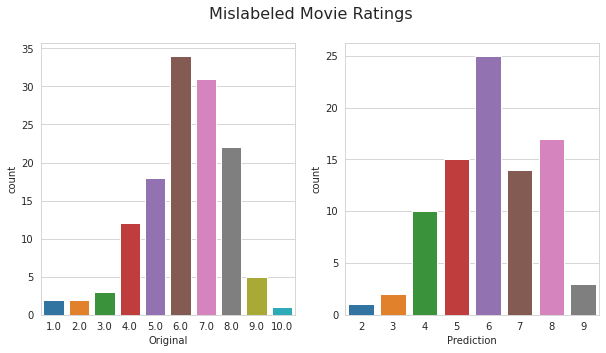

In [ ]:
graph_mislabeled(lr_df)

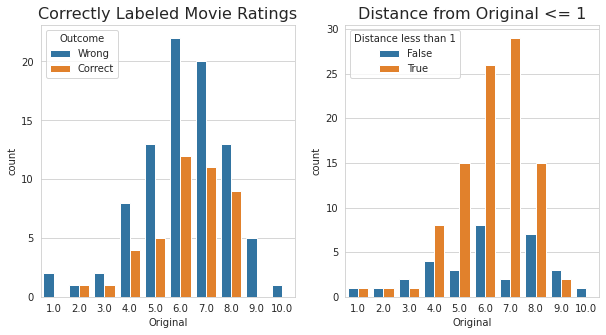

In [ ]:
graph_correct(lr_df)

Judging from the $MAE$ and the $R^2$ scores on the training set, the model underfits the data. However, the $MAE$ of the validation set is lower than that of the training, with a value of ~$1.1$. It has an overal accuracy of $33\%$ with prediction range $[2,9]$ and it seems to be struggling to correctly predict values in the range $\{1\}∪[9,10]$. Lastly, it has an accuracy with tolerance of 1 ~$75\%$ with correct predictions in the range $[1,9]$

### Support Vector Machine

We will now try a Support Vector Regressor. The `kernel` was set to "poly" of `degree=3`, `epsilon` was set to 0.3 and finally the the parameter `C` was set to 2.

In [ ]:
# Initialize model
from sklearn.svm import SVR

svmregressor = SVR(kernel='rbf', epsilon=0.3, C=2);

svmmodel, lrscaler, y_test, y_pred = cross_validation(X, y, estimator=svmregressor, n_folds=5, oversampling=True)

y_pred = discretize(y_pred)
svm_df = make_df(y_test, y_pred)

Fold:  1
Mean Absolute Error =  1.238514553269934
R2 score =  0.1230139485661067
--------------------------------------
Fold:  2
Mean Absolute Error =  1.1402722207896046
R2 score =  0.06045394169400664
--------------------------------------
Fold:  3
Mean Absolute Error =  1.1203613760624802
R2 score =  0.270500316051394
--------------------------------------
Fold:  4
Mean Absolute Error =  1.3500757423427894
R2 score =  -0.033994534864714376
--------------------------------------
Fold:  5
Mean Absolute Error =  1.1970907736871381
R2 score =  0.06709015811234853
--------------------------------------


Best Model performance

--------------------------------------
Training: 
--------------------------------------
Mean Absolute Error =  1.0796892099390067
R2 score =  0.5951456905226259
--------------------------------------
Validation: 
--------------------------------------
Mean Absolute Error =  1.1203613760624802
R2 score =  0.270500316051394


In [ ]:
classification_metrics(svm_df)

Accuracy for each category:
--------------------------------------------------
Rating: 1, Average Distance 4
Correctly labeled: 0 (~0%)

Rating: 2, Average Distance 2
Correctly labeled: 0 (~0%)

Rating: 3, Average Distance 2
Correctly labeled: 0 (~0%)

Rating: 4, Average Distance 1
Correctly labeled: 4 (~36%)

Rating: 5, Average Distance 1
Correctly labeled: 5 (~26%)

Rating: 6, Average Distance 1
Correctly labeled: 9 (~26%)

Rating: 7, Average Distance 1
Correctly labeled: 13 (~42%)

Rating: 8, Average Distance 1
Correctly labeled: 5 (~24%)

Rating: 9, Average Distance 1
Correctly labeled: 1 (~20%)

Rating: 10, Average Distance 2
Correctly labeled: 0 (~0%)

--------------------------------------------------
Overall accuracy: 0.2846153846153846
--------------------------------------------------
Overall prediction distance <= 1: 92 (~71%)



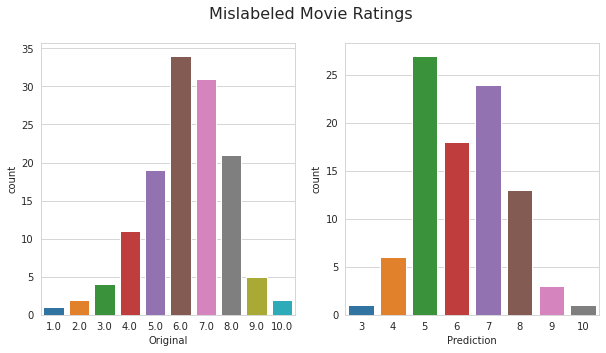

In [ ]:
graph_mislabeled(svm_df)

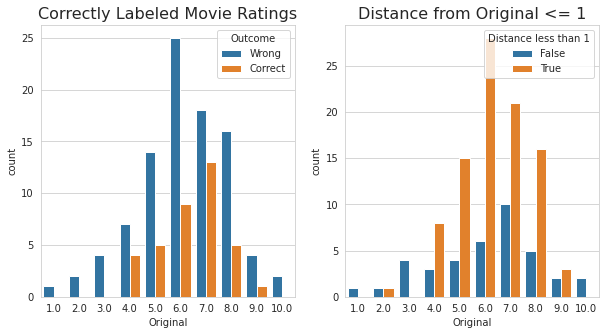

In [ ]:
graph_correct(svm_df)

Judging from the regression metrics on the training set, it seems that SVR is fitting the data better than the linear regression model but its performance isn't great either. The validation metrics show that the model is overfitting the data. Here can observe both high bias and high variance causing the model to overfit and underfit at the same time.$^{[1]}$

For the validation set, $MAE = 1.1$ and $R^2=0.27$, the overal accuracy is $28.4\%$ with prediction range $[3,10]$ but it seems to be struggling to correctly predict values in the range $[1,3]∪\{10\}$ and especially with the class $1$, as the predictions for that rating have an absolute error of 4(!). Finally, it has an accuracy with tolerance of 1 ~$71\%$ with correct predictions in the range $[2,9]$.

Overally, this model seems to be performing worse. All of its metrics are lower than that of the linear regression metrics.

\

[1] A. NG, "Machine Learning Yearning", 2018, pp.44

### Random Forest Regressor

We're will avoid creating a single Regression Tree as it's more prone to overfitting, instead we'll directly make a a Random Forest Regressor. The dataset is small enough to train multiple trees without the disadvantage of the long training time. However, that might also be a constraint, as Random Forests work better with big datasets. The hyperparameters are `max_depth=5`, `random_estimators=20` and `min_samples_split=5`. Increasing the number of estimators caused the model to perfom slightly better but on a smaller prediction range. The quality split `criterion` used is the default "squared_error", absolute_error was also tried but the range of the prediction was smaller.

In [ ]:
# Initialize model
from sklearn.ensemble import RandomForestRegressor

rfregressor = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=0, min_samples_split=5, n_jobs=-1)

rfmodel, rfscaler, y_test, y_pred = cross_validation(X, y, estimator=rfregressor, n_folds=5, oversampling=True)

y_pred = discretize(y_pred)
rfr_df = make_df(y_test, y_pred)

Fold:  1
Mean Absolute Error =  1.1715508827302412
R2 score =  0.12278790504436332
--------------------------------------
Fold:  2
Mean Absolute Error =  1.2707167156428458
R2 score =  -0.07620556935951783
--------------------------------------
Fold:  3
Mean Absolute Error =  1.047813592855243
R2 score =  0.3327635926667829
--------------------------------------
Fold:  4
Mean Absolute Error =  1.3420578784125763
R2 score =  -0.08170028303937138
--------------------------------------
Fold:  5
Mean Absolute Error =  1.142937491193824
R2 score =  0.1441880692273806
--------------------------------------


Best Model performance

--------------------------------------
Training: 
--------------------------------------
Mean Absolute Error =  1.082641092435843
R2 score =  0.6480288712040195
--------------------------------------
Validation: 
--------------------------------------
Mean Absolute Error =  1.047813592855243
R2 score =  0.3327635926667829


In [ ]:
classification_metrics(rfr_df)

Accuracy for each category:
--------------------------------------------------
Rating: 1, Average Distance 3
Correctly labeled: 0 (~0%)

Rating: 2, Average Distance 2
Correctly labeled: 0 (~0%)

Rating: 3, Average Distance 2
Correctly labeled: 0 (~0%)

Rating: 4, Average Distance 1
Correctly labeled: 1 (~9%)

Rating: 5, Average Distance 1
Correctly labeled: 9 (~47%)

Rating: 6, Average Distance 1
Correctly labeled: 16 (~47%)

Rating: 7, Average Distance 1
Correctly labeled: 7 (~23%)

Rating: 8, Average Distance 1
Correctly labeled: 3 (~14%)

Rating: 9, Average Distance 2
Correctly labeled: 0 (~0%)

Rating: 10, Average Distance 2
Correctly labeled: 0 (~0%)

--------------------------------------------------
Overall accuracy: 0.27692307692307694
--------------------------------------------------
Overall prediction distance <= 1: 99 (~76%)



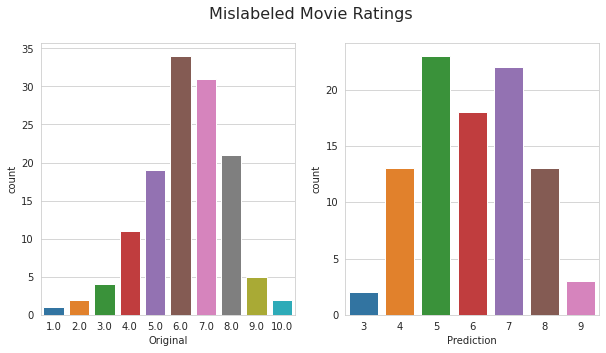

In [ ]:
graph_mislabeled(rfr_df)

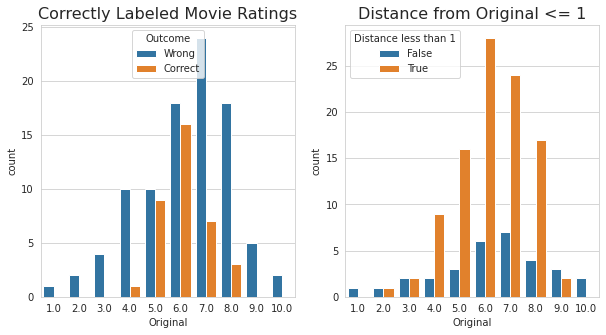

In [ ]:
graph_correct(rfr_df)

Comparing the training and validation $R^2$ with each other, once again we can notice overfitting. However, since the $MAE$ of the validation is still acceptable -even though it is much lower than that of the training- and since the model is performing relatively well on the data, we will not take any further action to minimize overfitting.

For the validation set, $MAE = 1$ and $R^2=0.33$ while the overal accuracy is $27.6\%$ with prediction range $[3,9]$. It seems to be struggling to correctly predict values in the range $[1,4]∪[9,10]$. Finally, it has an accuracy with tolerance of 1 ~$76\%$ with correct predictions in the range $[2,9]$.

Comparing Random Forest to the previous models, we can see that it performs slightly better than SVR but worse than linear regression.

### Gradient Boosting

Finally, the last model we'll use will be Gradient Boosting. The hyperparameters were set at `n_estimators = 30` and `max_depth=5`. In this model however we will perform a 10-fold split instead of a 5-fold that we did in all the previous models. Through trial and error that was deemed to be much more effective.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gradBoost = GradientBoostingRegressor(n_estimators = 30, max_depth = 5, learning_rate = 0.1, random_state=0)
gradbmodel, gradbscaler, y_test, y_pred = cross_validation(X, y, estimator=gradBoost, n_folds=10, oversampling=True)

y_pred = discretize(y_pred)
xgb_df = make_df(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  UserWarning,


Fold:  1
Mean Absolute Error =  1.1309984699440063
R2 score =  0.14580340177290063
--------------------------------------
Fold:  2
Mean Absolute Error =  1.1624465910575439
R2 score =  0.13130978958208284
--------------------------------------
Fold:  3
Mean Absolute Error =  1.1493609641075153
R2 score =  0.12268214101990615
--------------------------------------
Fold:  4
Mean Absolute Error =  1.2054877867940867
R2 score =  0.08499431460622087
--------------------------------------
Fold:  5
Mean Absolute Error =  1.2610462211774034
R2 score =  0.058674979383444015
--------------------------------------
Fold:  6
Mean Absolute Error =  0.9687771111328669
R2 score =  0.4683187671749427
--------------------------------------
Fold:  7
Mean Absolute Error =  1.338391379224271
R2 score =  -0.09840130929759194
--------------------------------------
Fold:  8
Mean Absolute Error =  1.363393970131549
R2 score =  -0.16604958213652843
--------------------------------------
Fold:  9
Mean Absolute E

In [ ]:
classification_metrics(xgb_df)

Accuracy for each category:
--------------------------------------------------
Rating: 1, Average Distance 3
Correctly labeled: 0 (~0%)

Rating: 2, Average Distance 1
Correctly labeled: 0 (~0%)

Rating: 3, Average Distance 2
Correctly labeled: 0 (~0%)

Rating: 4, Average Distance 1
Correctly labeled: 2 (~33%)

Rating: 5, Average Distance 1
Correctly labeled: 4 (~44%)

Rating: 6, Average Distance 1
Correctly labeled: 7 (~39%)

Rating: 7, Average Distance 1
Correctly labeled: 5 (~33%)

Rating: 8, Average Distance 1
Correctly labeled: 3 (~30%)

Rating: 9, Average Distance 1
Correctly labeled: 0 (~0%)

Rating: 10, Average Distance 1
Correctly labeled: 0 (~0%)

--------------------------------------------------
Overall accuracy: 0.3230769230769231
--------------------------------------------------
Overall prediction distance <= 1: 53 (~82%)



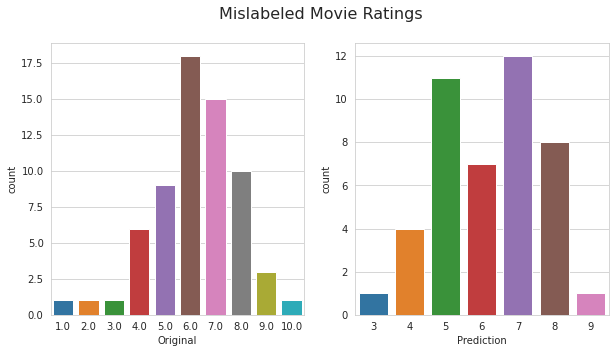

In [ ]:
graph_mislabeled(xgb_df)

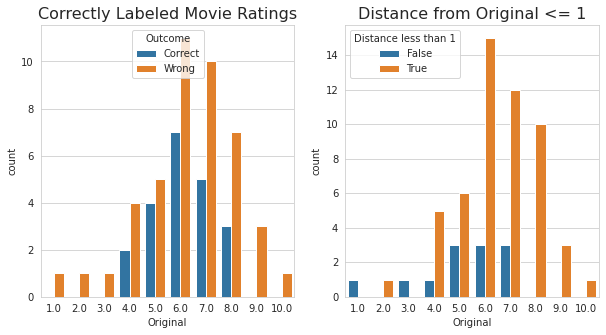

In [ ]:
graph_correct(xgb_df)

Even though the validation $R^2$ score is much lower than the training one, validation $MAE$ is almost equal to the training one. That means that there is some overfitting but the model still performs good enough. The overall accuracy is $32.3\%$ with prediction range $[3,9]$. The accuracy with tolerance of 1 is $82\%$ with prediction range $[2,10]$

Judging from the metrics and the graph of the accuracy with tolerance of 1, the vast majority of the predictions have a $MAE <= 1$. That along with the good overal accuracy score and wide range, makes Gradient Boosting better performing than the previous models. One thing that needs attention is that after the split the least populated class has a total of 8 members while the number of folds is 10. That means that the split cannot be stratified properly and the least populated class might not be present in every fold or the validation set might not have enough representatives from each class in order for us to be confident about the model's performance (in our split for example, there's only 1 instance for the classes 1,2,3,10 in the test set). To see if the model is stable enough and if its resulst are valid and not just a statistical error due to bad sampling, different random seeds were tried and similar results were be observed, giving the model some extra credibility.

# Select and Save Best Model

It's time to decide which is the best model and save it for future use. The models' performances can be summarized in the table below:

\begin{array}{|  |c | c | c ||}
  \hline
\textbf{Models} & \mathbf{R^2} & \textbf{MAE} & \textbf{Acc} & \textbf{Tol Acc} & \textbf{Range} & \textbf{Tol Range}\\
  \hline\\
\textbf{Lin. Reg.}   & 0.23   &  1.1 & 0.33 & 0.75 & [2,9] & [1,9]\\
  \hline\\
\textbf{SVR}   &  0.27 & 1.1 & 0.28 & 71 & [3,10] & [2,10]\\
  \hline\\
\textbf{Rand. For.}  &  0.33 & 1 & 0.28 & 0.76 & [3,9] & [2,9]\\
\hline\\
\textbf{Grad. Boost.}   & 0.46 & 1 & 0.32 & 0.82 & [3,9] & [2,10]\\
\hline
\end{array}

Based on the table above, the model that I believe performs better overally is Gradient Boosting mainly due to the low MAE, the high accuracy with tolerance of 1 and the wide prediction range.  

In [ ]:
import pickle

final_model = gradbmodel
final_scaler = gradbscaler

model_name = 'MovieRating_Model.sav'
scaler_name = 'MovieRating_Scaler.pkl'

pickle.dump(final_model, open('/content/drive/MyDrive/Colab_Notebooks/AIDL/AIDL_A01/Regression/'+model_name, 'wb'))
pickle.dump(final_scaler, open('/content/drive/MyDrive/Colab_Notebooks/AIDL/AIDL_A01/Regression/'+scaler_name, 'wb'))

# Implementation

We'll now try the model with a simple implementation.

In [ ]:
!pip install git+https://github.com/cinemagoer/cinemagoer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cinemagoer/cinemagoer to /tmp/pip-req-build-wgphofll
  Running command git clone -q https://github.com/cinemagoer/cinemagoer /tmp/pip-req-build-wgphofll
  Created wheel for cinemagoer: filename=cinemagoer-2022.5.29-py3-none-any.whl size=301835 sha256=b48b6aed9b98aa709296e21aeaccf00017c298e0be04a060f9604d079d724928
  Stored in directory: /tmp/pip-ephem-wheel-cache-yiib2yr1/wheels/aa/25/77/eb71e4144eee1ee1883f440f5ec3898f09ab0291ed60193313
Successfully built cinemagoer


In [ ]:
#@title Paste IMDb link of the movie you want to predict

movie_url = "https://www.imdb.com/title/tt0118694/?ref_=nv_sr_srsg_0" #@param {type:"string"}

# Get movie id
movie_id = [i for i in movie_url.split('/') if i.startswith('tt')][0][2:]  # Movie id is the only phrase in url that starts with "tt". The id is the numbers after "tt"

## Get Features

In [ ]:
# Get extra info from imdb
# Writers, Actors, Country of Origin, Language

from imdb import Cinemagoer

relevant_features = ['IMDb Rating', 'Runtime (mins)', 'Num Votes', 'Year Range', 'Foreign',
            'James Wan', 'Kevin Spacey', 'Krzysztof Kieslowski', 'Martin Scorsese',
            'Others', 'Quentin Tarantino', 'Samuel L. Jackson', 'Stanley Kubrick',
            'Steve Buscemi', 'Action', 'Biography', 'Drama', 'Horror', 'Sci-Fi',
            'War']

relevant_crew = relevant_features[5:14]
other_crew = ['Robert De Niro', 'Tim Burton', 'Leonardo DiCaprio', 'Pedro Almodóvar', 
              'Johnny Depp', 'John Lasseter', 'Tom Hanks', 'Brad Pitt', 'Richard Linklater', 
              'Woody Allen', 'Ben Stiller',  'Al Pacino', 'David Fincher', 'Charlie Kaufman', 
              'Antonio Banderas', 'Alejandro G. Iñárritu', 'Will Smith', 'Meryl Streep', 
              'Joel Coen','John Goodman', 'Ethan Coen', 'Darren Aronofsky', 'Daniel Radcliffe',
              'Eric Darnell', 'Steven Spielberg', 'Angelina Jolie', 'Christopher Nolan',
              'Sacha Baron Cohen', 'Danny Boyle', 'Helena Bonham Carter', 'Carlos Saldanha',
              'Owen Wilson', 'Chris Columbus', 'Eddie Murphy']

relevant_genres = relevant_features[14:]

goer = Cinemagoer()
movie = goer.get_movie(movie_id)

In [ ]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get(movie["cover url"])
cover = Image.open(BytesIO(response.content))

title = movie["title"]
imdb_rating = movie["rating"]
runtime = int(movie["runtimes"][0])
num_votes = movie["votes"]
year = movie["year"]
country = movie["countries"][0]
language = movie["languages"][0]
actors = [actor["name"] for actor in movie["cast"][:10]]  # Get actors for each movie
directors = [director["name"] for director in movie["cast"]]
writers = [movie["writer"][0]]  # Get only one writer
genres = [0]*len(relevant_genres)
mvp = [0]*len(relevant_crew)

In [ ]:
# Get year range
if year <= 1960:
  year_range = 0
elif 1960 < year <= 2000:
  year_range = 1
elif 2000 < year <= 2010:
  year_range = 2
else:
  year_range = 3

# Get if foreign
if country not in ('United States', 'United Kingdom', 'Canada') and language != 'English':
  is_foreign = 1
else:
  is_foreign = 0

# Get relevant crew
for i, member in enumerate(relevant_crew):
  
  if member in (actors + directors + writers):
    print(member)
    mvp[i] = 1

# Get relevant genres
for j, genre in enumerate(relevant_genres):
  if genre in movie["genres"]:
    genres[j] = 1

In [ ]:
X_test = np.array([imdb_rating, runtime, num_votes, year_range, is_foreign] + mvp + genres).reshape(1, -1)

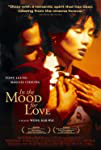

Based on the your preferences, you will rate the movie 'In the Mood for Love' with a 8/10


In [ ]:
# Scale new data
X_test = final_scaler.transform(X_test)

# Predict
y_test = final_model.predict(X_test)
y_test = discretize(y_test)  # Discretize predictions

display(cover)
print(f"Based on the your preferences, you will rate the movie '{title}' with a {y_test[0]}/10")

# Conclusion

This project turned out to be much harder than what I thought when I first conceived the idea. As it seems it is quite difficult to predict personalized preferences. That could be due to a variety of reasons and constraints. 

First of all, the dataset was quite problematic. There were only a few instances on a very imbalanced set with a lot of features. Secondly, the dataset doesn't contain a lot of extremely important factors like the script, the soundtrack, special FX quality etc. In addition to that, the dataset was created in the span of many years. Of course taste in movies, as in everything, changes with time. That constitues the problem dynamic in such a way that it seems improbable tο be able to embed such information into the dataset. Another factor that makes the project challenging is mood. Even if our taste stays the same within the years, our mood doesn't. The rating of a movie is highly related to our mood at the time. That is also a very important factor that cannot be encoded and embeded into the dataset. For that exact reason, I think that the accuracy of tolerance 1 is much more reliable metric than the strict class accuracy or the $R^2$ score. Last but not least, the heart of this project is art. The interpretation of art is something subjective not just on an individual level but on a inner psychological level as well. You can never 100% sure if a movie will be to you're liking unless you watch it.

Despite the above mentioned difficulties, there might be possible ways to improve the models performance. On such idea is to limit the classes to just Like-Neutral-Dislike instead of 1-10 rating. On the more technical side, one improvement idea would be to try other oversampling techniques like ADASYN. Lastly, one more thing that might improve the model's performance is to implement a Stack Regressor Model, possibly with regression models on the first layer and classification model on the final layer.